In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-17_152708_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13']

# ADCSnap

In [5]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(433.0, 463.0),
 (434.0, 485.0),
 (422.0, 452.0),
 (447.0, 496.0),
 (463.0, 478.0),
 (439.0, 436.0),
 (463.0, 497.0),
 (493.0, 487.0),
 (439.0, 428.0),
 (536.0, 536.0),
 (408.0, 402.0),
 (375.0, 393.0),
 (368.0, 382.0)]

In [7]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(71.625454525062949, 78.304379344319756),
 (68.207659869276355, 74.569620660576931),
 (62.639077969861546, 68.601485686003414),
 (61.990972875030621, 67.230296724686838),
 (62.592863803176051, 66.726408993654189),
 (62.871239418413268, 66.228523631262604),
 (67.727159807935564, 69.628860801050621),
 (69.922142517601031, 70.940765866542662),
 (70.456070854238774, 71.019272897946081),
 (69.254385963786845, 69.089456686226612),
 (66.033824106819296, 66.193615386828895),
 (62.597948814339233, 62.586981534077047),
 (58.193193886424446, 58.289586441534148)]

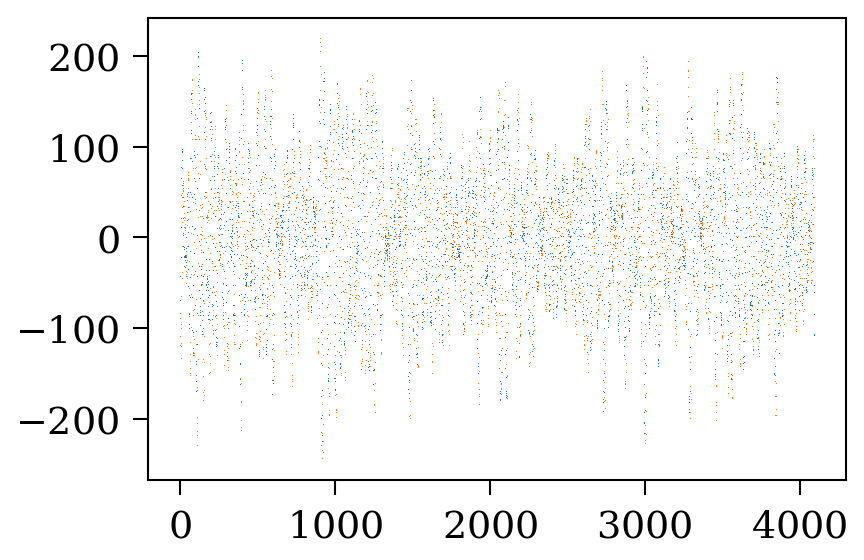

In [8]:
fig, ax = plt.subplots()
ax.plot(snaps[0].x, ',')
ax.plot(snaps[0].y, ',')

# Scan

In [9]:
scan = npd.Scan0
frequency, amplitude, smoothed = scan.stitch()

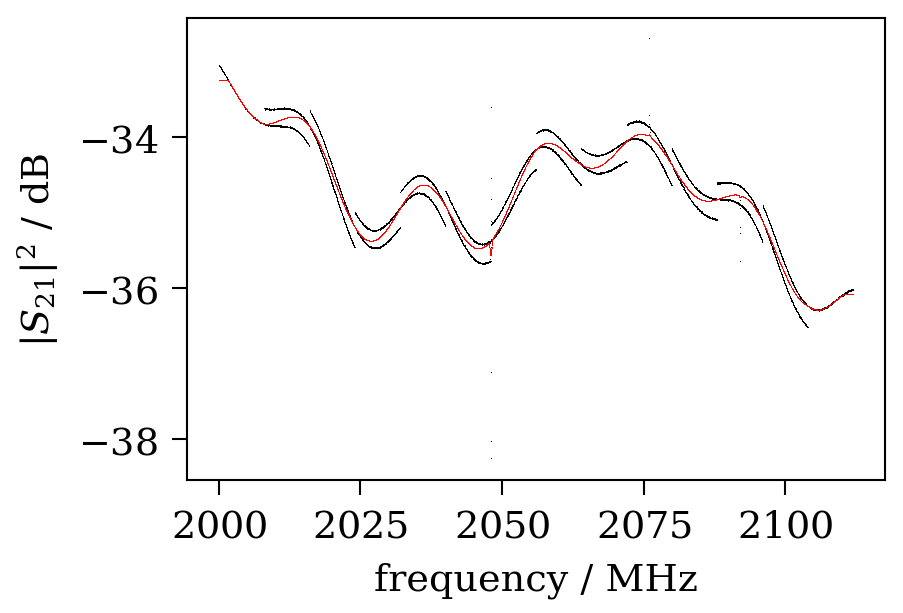

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.plot(1e-6 * frequency, 20 * np.log10(smoothed), ',r')


# stitch()

In [11]:
scan.sweep_arrays[0].frequency.size

1024

In [12]:
a = np.arange(10)
b = np.arange(7, 17)

In [13]:
a.size - int(np.where(a == b[0])[0])

3

In [14]:
np.where(scan.sweep_arrays[0].frequency[-1] == scan.sweep_arrays[1].frequency)[0]

array([511])

In [15]:
np.where(scan.sweep_arrays[1].frequency==scan.sweep_arrays[0].frequency)

(array([], dtype=int64),)